Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 25.9 MB 75 kB/s             
     |████████████████████████████████| 39.3 MB 12 kB/s              
     |████████████████████████████████| 306 kB 56.4 MB/s            
Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 127.2 MB 23 kB/s              �██████████████▍            | 77.3 MB 67.7 MB/s eta 0:00:01
     |████████████████████████████████| 5.4 MB 7.8 MB/s            


In [3]:
import time, random
import pandas as pd
from sklearn.linear_model import LinearRegression

times_df = pd.DataFrame({"length": [i * 1000 for i in range(11)], "ms": None}, dtype=float)
times_df

,length,ms
0,0.0,NaN
1,1000.0,NaN
2,2000.0,NaN
3,3000.0,NaN
4,4000.0,NaN
5,5000.0,NaN
6,6000.0,NaN
7,7000.0,NaN
8,8000.0,NaN
9,9000.0,NaN


In [10]:
def measure_shuffle(list_len):
    nums = list(range(list_len))
    t0 = time.time()
    random.shuffle(nums)
    t1 = time.time()
    return (t1-t0)*1000

<AxesSubplot:xlabel='length', ylabel='ms'>

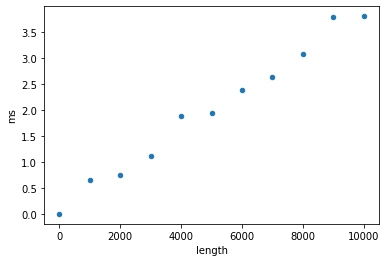

In [12]:
for i in times_df.index:
    length = int(times_df.at[i, "length"])
    times_df.at[i, "ms"] = measure_shuffle(length)

times_df.plot.scatter(x="length", y="ms")

In [16]:
lr = LinearRegression()
lr.fit(times_df[["length"]], times_df["ms"])
lr.predict([[1000000]])


/home/michaelkornely/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([382.02881813])

In [17]:
import pandas as pd
import sqlite3

df = pd.DataFrame([
    {"state": "wi", "city": "madison", "address": "123 Main St.", "item": "apples", "quantity": 3, "price": 1},
    {"state": "wi", "city": "madison", "address": "123 Main St.", "item": "oranges", "quantity": 4, "price": 0.8},
    {"state": "wi", "city": "madison", "address": "123 Main St.", "item": "cantaloupe", "quantity": 5, "price": 2},
    {"state": "wi", "city": "milwaukee", "address": "456 State St", "item": "apples", "quantity": 6, "price": 0.9},
    {"state": "wi", "city": "milwaukee", "address": "456 State St.", "item": "oranges", "quantity": 8, "price": 1.2},
])
connection = sqlite3.connect("grocery.db")
df.to_sql("sales", connection, if_exists="replace", index=False)


In [18]:
pd.read_sql("SELECT * FROM sales", connection)


,state,city,address,item,quantity,price
0,wi,madison,123 Main St.,apples,3,1.0
1,wi,madison,123 Main St.,oranges,4,0.8
2,wi,madison,123 Main St.,cantaloupe,5,2.0
3,wi,milwaukee,456 State St,apples,6,0.9
4,wi,milwaukee,456 State St.,oranges,8,1.2


In [19]:
pd.read_sql("SELECT item, SUM(quantity*price) AS dollars FROM sales GROUP BY item", connection)


,item,dollars
0,apples,8.4
1,cantaloupe,10.0
2,oranges,12.8


In [20]:
pd.read_sql("SELECT state,city,address, SUM(quantity*price) AS dollars FROM sales GROUP BY address", connection)


,state,city,address,dollars
0,wi,madison,123 Main St.,16.2
1,wi,milwaukee,456 State St,5.4
2,wi,milwaukee,456 State St.,9.6


In [21]:
df = pd.DataFrame([
    {"location_id": 1, "state": "wi", "city": "madison", "address": "123 Main St."},
    {"location_id": 2, "state": "wi", "city": "milwaukee", "address": "456 State St."},
])
df.to_sql("locations", connection, if_exists="replace", index=False)

df = pd.DataFrame([
    {"location_id": 1, "item": "apples", "quantity": 3, "price": 1},
    {"location_id": 1, "item": "oranges", "quantity": 4, "price": 0.8},
    {"location_id": 1, "item": "cantaloupe", "quantity": 5, "price": 2},
    {"location_id": 2, "item": "apples", "quantity": 6, "price": 0.9},
    {"location_id": 2, "item": "oranges", "quantity": 8, "price": 1.2},
])
df.to_sql("sales", connection, if_exists="replace", index=False)


In [23]:
pd.read_sql("SELECT * FROM sales", connection)


,location_id,item,quantity,price
0,1,apples,3,1.0
1,1,oranges,4,0.8
2,1,cantaloupe,5,2.0
3,2,apples,6,0.9
4,2,oranges,8,1.2


In [24]:
pd.read_sql("SELECT * FROM locations", connection)


,location_id,state,city,address
0,1,wi,madison,123 Main St.
1,2,wi,milwaukee,456 State St.


In [25]:
pd.read_sql("SELECT * FROM locations INNER JOIN sales", connection)


,location_id,state,city,address,location_id,item,quantity,price
0,1,wi,madison,123 Main St.,1,apples,3,1.0
1,1,wi,madison,123 Main St.,1,oranges,4,0.8
2,1,wi,madison,123 Main St.,1,cantaloupe,5,2.0
3,1,wi,madison,123 Main St.,2,apples,6,0.9
4,1,wi,madison,123 Main St.,2,oranges,8,1.2
5,2,wi,milwaukee,456 State St.,1,apples,3,1.0
6,2,wi,milwaukee,456 State St.,1,oranges,4,0.8
7,2,wi,milwaukee,456 State St.,1,cantaloupe,5,2.0
8,2,wi,milwaukee,456 State St.,2,apples,6,0.9
9,2,wi,milwaukee,456 State St.,2,oranges,8,1.2


In [26]:
pd.read_sql("""
  SELECT * FROM 
  locations INNER JOIN sales 
  ON locations.location_id = sales.location_id""",
  connection).drop(columns="location_id")


,state,city,address,item,quantity,price
0,wi,madison,123 Main St.,apples,3,1.0
1,wi,madison,123 Main St.,cantaloupe,5,2.0
2,wi,madison,123 Main St.,oranges,4,0.8
3,wi,milwaukee,456 State St.,apples,6,0.9
4,wi,milwaukee,456 State St.,oranges,8,1.2


In [27]:
pd.read_sql("""
  SELECT item, SUM(quantity*price) AS dollars
  FROM locations INNER JOIN sales 
  ON locations.location_id = sales.location_id
  GROUP BY item""", connection)

,item,dollars
0,apples,8.4
1,cantaloupe,10.0
2,oranges,12.8


In [30]:
pd.read_sql(""" SELECT state, city, address, SUM(quantity*price) AS dollars FROM locations INNER JOIN sales ON locations.location_id = sales.location_id GROUP BY state, city, address""", connection)


,state,city,address,dollars
0,wi,madison,123 Main St.,16.2
1,wi,milwaukee,456 State St.,15.0
